In [1]:
import sympy as sp

In [2]:
springConstant = sp.Symbol("k", real=True)

In [3]:
dampiningConstant = sp.Symbol("c", real=True)

In [4]:
amplitudeCoefficient = sp.Symbol("A")

In [5]:
frequency = sp.Symbol("omega", real=True)

In [6]:
position = sp.Function("x", real=True)

In [7]:
time = sp.Symbol("t", real=True)

In [8]:
drivingForce0 = sp.Symbol("F_0", real=True)

In [9]:
mass = sp.Symbol("m", real=True, positive=True)

In [10]:
steadyState = sp.Eq(position(time), amplitudeCoefficient * sp.sin(frequency * time))

In [11]:
restoringForce = -springConstant * position(time)

In [12]:
dampiningForce = -dampiningConstant * sp.Derivative(position(time), time)

In [13]:
drivingForce = drivingForce0 * sp.cos(frequency * time) # Unused

In [14]:
steadyState

Eq(x(t), A*sin(omega*t))

In [15]:
restoringForce

-k*x(t)

In [16]:
dampiningForce

-c*Derivative(x(t), t)

In [17]:
drivingForce # Unused

F_0*cos(omega*t)

In [46]:
velocityDerivative = sp.diff(position(time), time)

In [47]:
velocityDerivative

Derivative(x(t), t)

In [18]:
totalForce = sp.Eq(mass * sp.Derivative(position(time), time, 2), restoringForce + dampiningForce)

In [19]:
totalForce

Eq(m*Derivative(x(t), (t, 2)), -c*Derivative(x(t), t) - k*x(t))

In [20]:
# Change in frequency = velocity

In [49]:
totalForceSolutions = sp.dsolve(totalForce)#, position(time), ics={velocityDerivative : 0})

In [50]:
totalForceSolutions

Eq(x(t), C1*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)) + C2*exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m)))

In [23]:
C1 = sp.Symbol("C1")

In [24]:
C2 = sp.Symbol("C2")

In [25]:
totalForceSolutions.free_symbols

{C1, C2, c, k, m, t}

In [26]:
numericalSubstitutions = {C1 : 1, C2 : 1, dampiningConstant : 1, springConstant : 1, mass : 1}

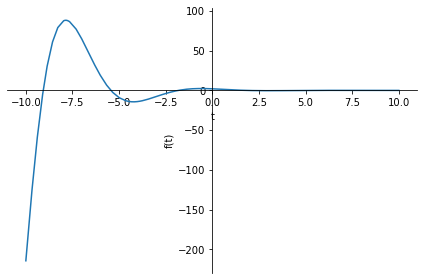

In [27]:
sp.plot(totalForceSolutions.rhs.subs(numericalSubstitutions))

In [28]:
omega = sp.sqrt((springConstant / mass) - ((dampiningConstant / (2 * mass)) ** 2))

In [29]:
omega

sqrt(-c**2/(4*m**2) + k/m)

In [30]:
givenSolution = sp.exp(-time * dampiningConstant / (2 * mass)) * sp.cos(omega * time)

In [31]:
givenSolution

exp(-c*t/(2*m))*cos(t*sqrt(-c**2/(4*m**2) + k/m))

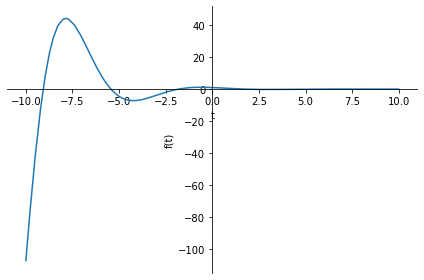

In [32]:
sp.plot(givenSolution.subs(numericalSubstitutions))

In [33]:
sp.Eq(givenSolution, totalForceSolutions.rhs).refine()

Eq(exp(-c*t/(2*m))*cos(t*sqrt(-c**2/(4*m**2) + k/m)), C1*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)) + C2*exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m)))